<a href="https://colab.research.google.com/github/emreer94/COVID-19_binary_classifier/blob/main/Covid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required Libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from glob import glob

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/nonaugmented_dataset/train'
valid_path = '/content/drive/MyDrive/nonaugmented_dataset/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/nonaugmented_dataset/*')
print(len(folders))

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# dictate the model what cost and optimization method will be used
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58892288/58889256 [==============================] - 3s 0us/step
2
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

# Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./299,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./299)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/nonaugmented_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 classes = ('normal','covid'),
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/nonaugmented_dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            classes = ('normal','covid'),
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 2000,
                         nb_epoch = 12,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 9929 images belonging to 2 classes.
Found 2482 images belonging to 2 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 2000,\n                         nb_epoch = 12,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

# Evaluation

Epoch 1/12
311/311 [==============================] - 5176s 17s/step - loss: 0.3789 - accuracy: 0.8568 - val_loss: 0.2361 - val_accuracy: 0.9061
Epoch 2/12
311/311 [==============================] - 173s 555ms/step - loss: 0.1918 - accuracy: 0.9296 - val_loss: 0.2528 - val_accuracy: 0.9037
Epoch 3/12
311/311 [==============================] - 174s 560ms/step - loss: 0.1635 - accuracy: 0.9391 - val_loss: 0.1915 - val_accuracy: 0.9194
Epoch 4/12
311/311 [==============================] - 174s 561ms/step - loss: 0.1434 - accuracy: 0.9428 - val_loss: 0.2527 - val_accuracy: 0.9021
Epoch 5/12
311/311 [==============================] - 175s 564ms/step - loss: 0.1346 - accuracy: 0.9466 - val_loss: 0.1939 - val_accuracy: 0.9247
Epoch 6/12
311/311 [==============================] - 175s 561ms/step - loss: 0.1283 - accuracy: 0.9512 - val_loss: 0.1599 - val_accuracy: 0.9355
Epoch 7/12
311/311 [==============================] - 175s 563ms/step - loss: 0.1364 - accuracy: 0.9463 - val_loss: 0.1432 - 

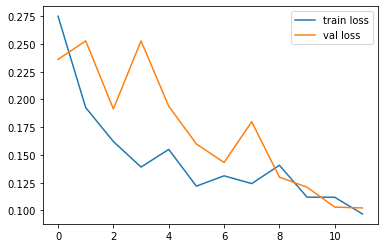

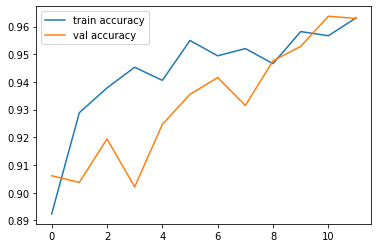

<Figure size 432x288 with 0 Axes>

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=12,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')